# Log-likelihood

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def LLvsdocs(exname, ax):
    """
    """
    results = np.loadtxt(exname + "/test-log.dat",skiprows=1)
    docs = results[:,2]
    LL = results[:,5]
    ax.plot(docs,LL,marker='o')
    ax.set_xlabel("Number of documents processed")
    ax.set_xlabel("Held-out log-likelihood")
    ax.set_title(exname)
    return 

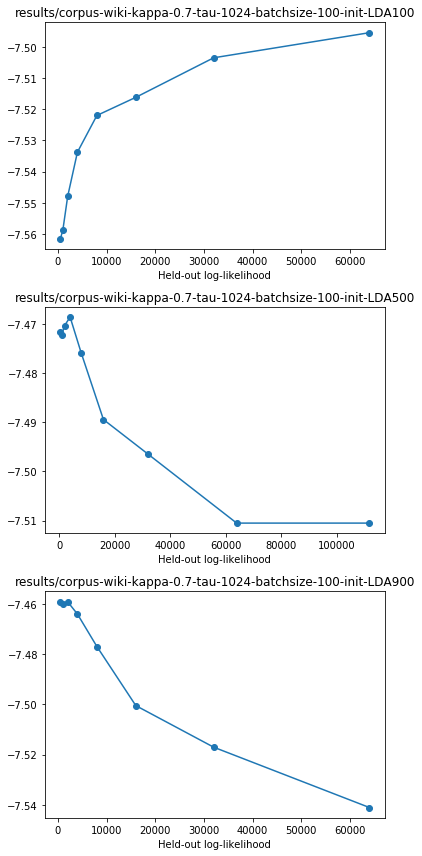

In [21]:
fig, axes = plt.subplots(3,1,figsize=(6,12))
LLvsdocs("results/corpus-wiki-kappa-0.7-tau-1024-batchsize-100-init-LDA100", axes[0])
LLvsdocs("results/corpus-wiki-kappa-0.7-tau-1024-batchsize-100-init-LDA500", axes[1])
LLvsdocs("results/corpus-wiki-kappa-0.7-tau-1024-batchsize-100-init-LDA900", axes[2])
plt.tight_layout()
plt.show()

# Inferred topics

In [3]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

def printtopics(vocabfile, filepath, dirthresh, displaycount):
    """
    Inputs:
        vocabfile:
        filepath
        dirthresh:
        displaycount:
    Outputs:
    """
    vocab = open(vocabfile).readlines()
    testlambda = np.loadtxt(filepath)
    
    sigtopics = 0
    df = pd.DataFrame() 
    for k in range(0, len(testlambda)):
        lambdak = list(testlambda[k, :])
        lambdak = [round(i,1) for i in lambdak]
        temp = list(zip(lambdak, list(range(0, len(lambdak)))))
        temp = sorted(temp, key = lambda x: x[0], reverse=True)
        dirichlets = np.array(temp)[:,0]
        widices = np.array(temp,dtype=int)[:,1]
        # plot topics with parameters exceeding the threshold
        if (dirichlets[0] >= dirthresh):
            meanparam = np.mean(dirichlets[:displaycount])
            colname = "topic %d" % k
            coldata = [(str.strip(vocab[widices[i]]), dirichlets[i]) for i in range(0, displaycount)]
            df[colname] = coldata
    print("Discovered %d significant topics at dirichlet threshold %.2f" %(len(df.columns),dirthresh))
    return df

## Forget more quickly

In [11]:
vocabfile = "dictnostops.txt"
filepath = "results/corpus-wiki-kappa-0.5-tau-1-batchsize-100/doc_count-8000.topics"
dirthresh = 50
displaycount = 10
printtopics(vocabfile, filepath, dirthresh, displaycount)

Discovered 6 significant topics at dirichlet threshold 50.00


,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5
0,"(first, 11337.9)","(poland, 135.5)","(score, 421.9)","(district, 124.3)","(population, 105.3)","(district, 74.5)"
1,"(new, 10261.6)","(village, 130.3)","(team, 133.7)","(rural, 98.6)","(elevation, 82.1)","(county, 52.8)"
2,"(team, 8129.4)","(county, 127.1)","(seed, 66.2)","(county, 73.1)","(france, 33.1)","(rural, 48.7)"
3,"(two, 7322.6)","(district, 124.6)","(round, 14.4)","(province, 68.9)","(date, 27.5)","(province, 48.7)"
4,"(john, 7187.4)","(south, 72.5)","(first, 9.5)","(village, 68.3)","(area, 27.5)","(village, 29.9)"
5,"(services, 6600.8)","(west, 67.8)","(second, 4.9)","(population, 67.6)","(department, 27.5)","(population, 27.7)"
6,"(county, 6417.3)","(province, 63.5)","(half, 3.7)","(families, 34.4)","(max, 27.5)","(families, 24.4)"
7,"(time, 6373.0)","(east, 58.4)","(champion, 2.7)","(central, 30.2)","(min, 27.5)","(central, 23.6)"
8,"(years, 5971.3)","(lies, 55.7)","(seeds, 2.5)","(russia, 29.8)","(southern, 10.8)","(known, 11.7)"
9,"(school, 5868.6)","(north, 54.1)","(draw, 2.5)","(streets, 20.9)","(village, 6.7)","(north, 9.1)"


## Forget more slowly

In [15]:
vocabfile = "dictnostops.txt"
filepath = "results/corpus-wiki-kappa-0.7-tau-1024-batchsize-100/doc_count-32000.topics"
dirthresh = 50
displaycount = 10
printtopics(vocabfile, filepath, dirthresh, displaycount)

Discovered 10 significant topics at dirichlet threshold 50.00


,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 9,topic 13
0,"(new, 5532.1)","(first, 3500.5)","(team, 5146.8)","(ship, 1964.6)","(score, 8448.4)","(district, 424.0)","(died, 59.6)","(district, 165.6)","(und, 57.1)","(alexander, 244.2)"
1,"(first, 3512.7)","(new, 3314.4)","(goals, 3951.7)","(line, 871.8)","(team, 3055.9)","(island, 315.7)","(county, 56.3)","(population, 164.1)","(der, 42.9)","(family, 3.5)"
2,"(march, 3304.3)","(two, 2658.6)","(season, 3774.8)","(station, 735.3)","(seed, 2083.0)","(village, 248.3)","(district, 55.5)","(county, 103.4)","(die, 33.2)","(species, 3.3)"
3,"(university, 3047.7)","(music, 2420.4)","(first, 3400.4)","(railway, 378.2)","(round, 331.6)","(county, 243.9)","(north, 43.7)","(rural, 98.6)","(des, 31.6)","(genus, 2.5)"
4,"(county, 3022.5)","(time, 2414.2)","(left, 2864.8)","(service, 307.3)","(first, 153.1)","(population, 211.2)","(american, 43.6)","(province, 98.5)","(natural, 17.0)","(fly, 1.9)"
5,"(state, 3002.0)","(series, 2260.7)","(years, 2473.9)","(new, 297.2)","(van, 100.7)","(province, 163.1)","(village, 43.6)","(elevation, 86.1)","(das, 16.2)","(wood, 1.8)"
6,"(city, 2810.9)","(best, 2149.3)","(league, 2333.3)","(two, 272.5)","(second, 98.1)","(south, 161.8)","(species, 41.0)","(village, 64.6)","(saxon, 15.2)","(minor, 1.6)"
7,"(school, 2631.4)","(released, 1980.2)","(new, 2244.9)","(road, 218.1)","(final, 59.9)","(christmas, 145.9)","(poland, 37.5)","(central, 54.2)","(regions, 12.4)","(involved, 1.5)"
8,"(united, 2593.4)","(song, 1685.5)","(two, 1970.1)","(island, 212.0)","(michael, 55.7)","(north, 144.1)","(family, 36.8)","(department, 42.9)","(von, 9.3)","(neighbour, 1.1)"
9,"(states, 2490.5)","(year, 1683.6)","(score, 1963.5)","(south, 205.4)","(draw, 52.3)","(species, 136.1)","(south, 34.0)","(families, 38.0)","(hill, 9.1)","(found, 1.0)"
